# Average temperatures by day and night

The following plots show the evolution of the average temperatures, separated between day and night time. The difference is also plotted. The criteria to distinguis night and day is the value read by the light sensor. When the value is over 50 the reading is considered to correspond to daytime.

## Preparation and reading of data

The data is read from the monthly HDF files, which contain a *daily* dataset with the average values for the four measured magnitudes already separated by day and night.

All the datasets present in the data directory are appended to the ```dailies``` dataframe. The monthly datasets are also available in the ```datasets``` array.

In [1]:
import os
import pandas as pd
import plotnine as gg

hdfDirectory = os.path.join(os.path.curdir, 'data')

files = [ os.path.join(hdfDirectory,f) for f in os.listdir(hdfDirectory)]
dailies = pd.DataFrame(columns = ['date','count','daytime','humidity','light','pressure','temperature'])

datasets = [ pd.read_hdf(f,key='daily') for f in files]
for d in datasets:
    dailies = dailies.append(d)


## Plot definition

This pyhon function generates a plot which shows the day and night time averages as well and its difference. The plot only considers the days for which we have **both** a day and a night average and discards the rest.

In [2]:
def plotTemps(d,intv='1 week'):
    """
    plotTemps - generate a day/night temperature plot
    Parameters:
    - d: DataFrame containing the data to plot. This function makes a copy of a slice of
    this dataframe containing just the 'date','daytime' and 'temperature' columns.
    - intv: Interval between x axis datapoints.
    Returns:
    - ggplot object ready to be drawn
    """
    tempsByDay = d[['date','daytime','temperature']].copy(deep=True)
    tempsByDay['daytime'] = tempsByDay.apply(lambda x: 'Day' if x['daytime'] else 'Night', axis=1)
 
    tempsByDay = tempsByDay.pivot(index='date',values='temperature',columns='daytime').dropna()
    tempsByDay['Difference'] = tempsByDay.apply(lambda x: x['Day']-x['Night'],axis=1)
    tempsByDay = tempsByDay.stack().reset_index()
    tempsByDay.columns = ['date','daytime','temperature']
    return gg.ggplot(tempsByDay) + \
           gg.geom_line(gg.aes(x='date',y='temperature',color='daytime')) + \
           gg.scale_color_manual(values=['red','blue','green'],
                           limits=['Day','Night','Difference'], 
                           name="Daytime") + \
           gg.scale_x_datetime(date_breaks=intv) + \
           gg.theme(axis_text_x = gg.element_text(angle=90)) + \
           gg.xlab('Date') + gg.ylab('ºC') + gg.ggtitle('Average temperatures')


    

## Plots

### Accumulated plot

This plot contains all the available information (just the part which has been dumped to the HDF files).

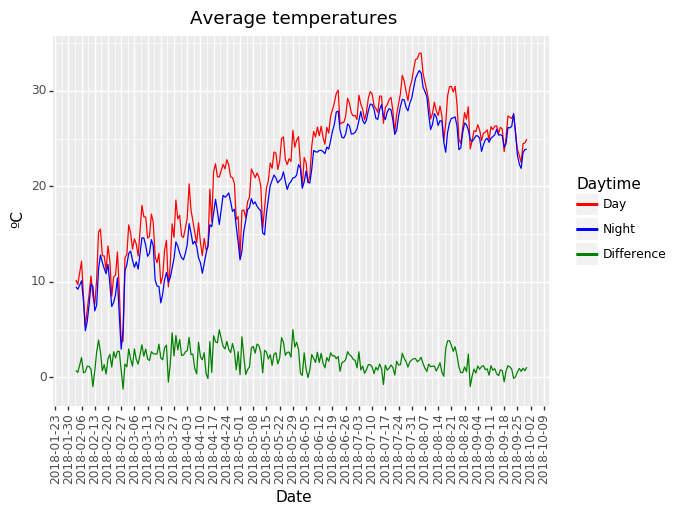

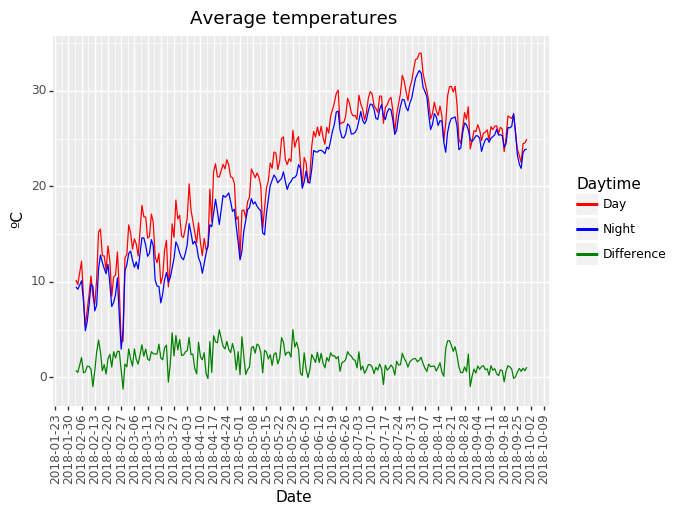

In [3]:
plotTemps(dailies).draw()

### Monthly plots

The following plots contain each one information corresponding to a single month.

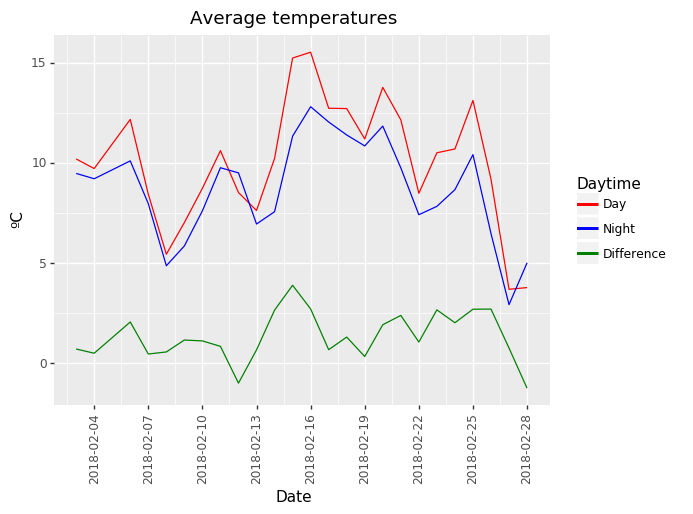

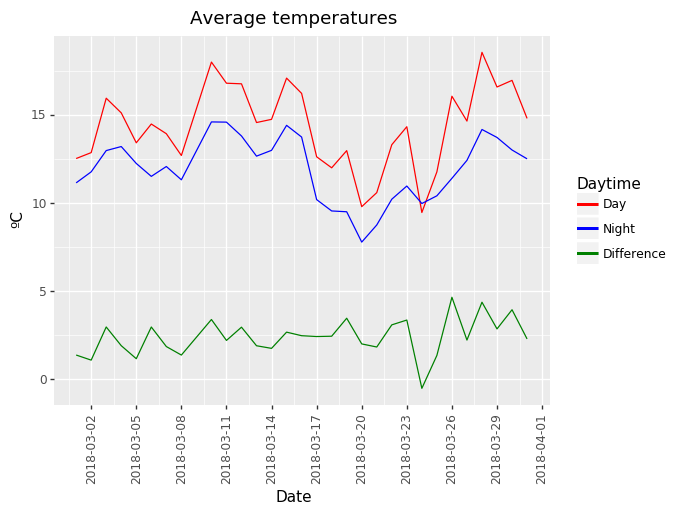

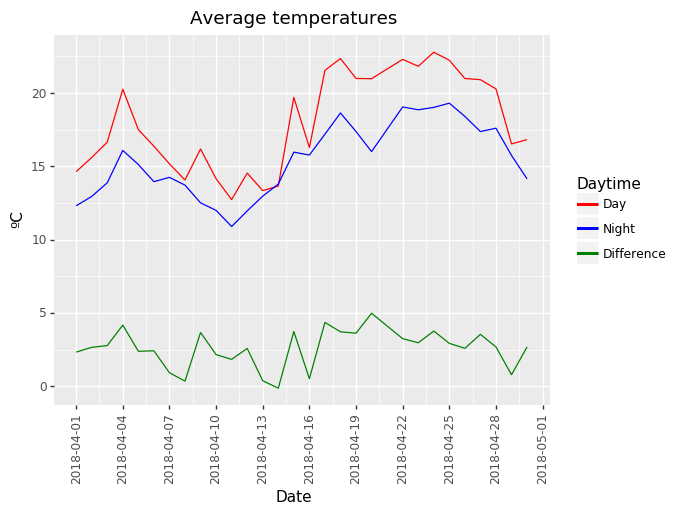

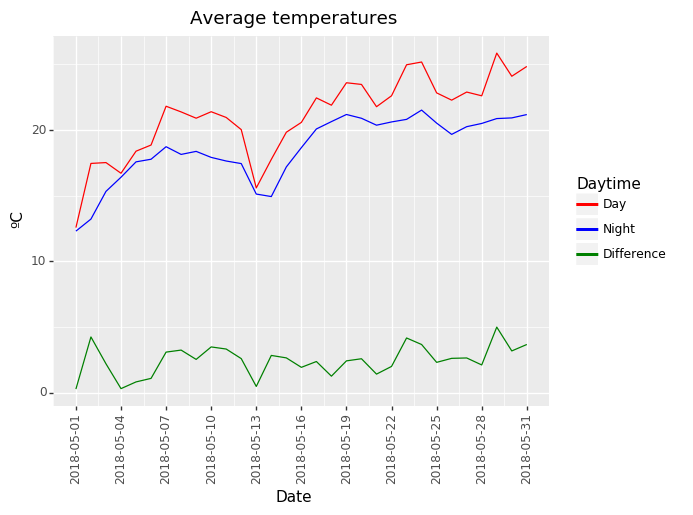

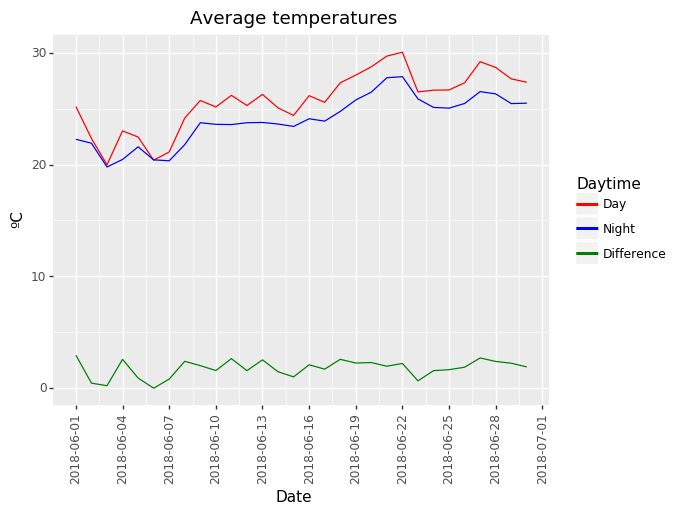

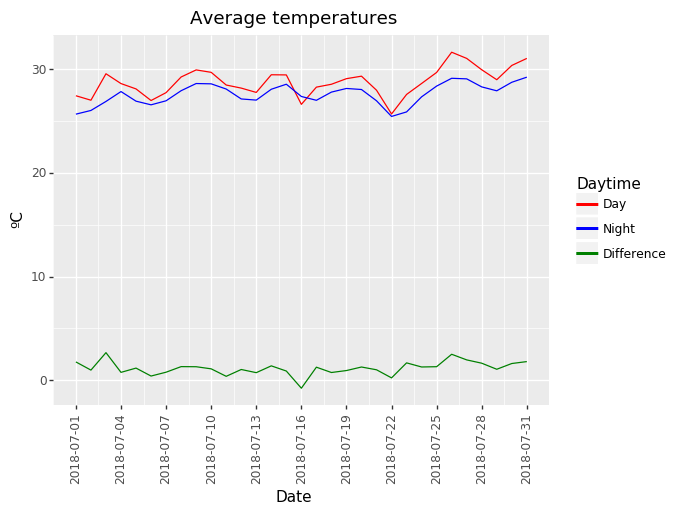

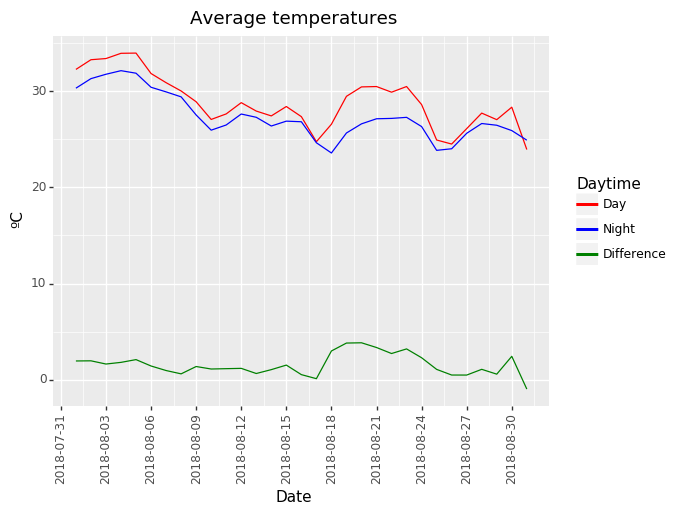

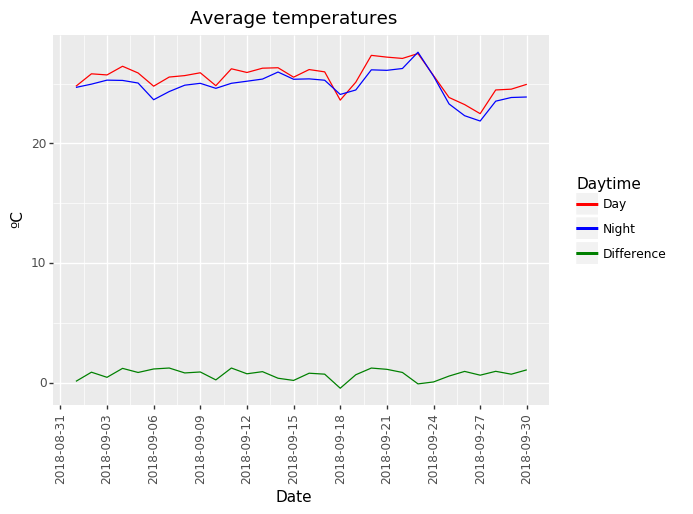

In [4]:
for d in datasets:
    plotTemps(d,intv='3 days').draw()
    